In [14]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\DOANTR~1\AppData\Local\Temp/ipykernel_26860/1582677321.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


# Gradient descent in 1D

In [15]:
# Function (as a function)
def f_x(x):
  return 3 * x ** 2 - 3 * x + 4

# Derivative function
def deriv(x):
  return 6 * x - 3

Plot the function and its derivative

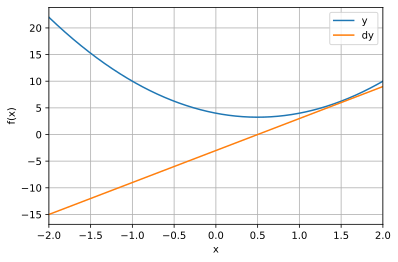

In [16]:
# Define a range for x
x = np.linspace(start=-2, stop=2, num=2001)

# Plotting
plt.plot(x, f_x(x), x, deriv(x))
plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y', 'dy'])
plt.show()

# G.D using a `fixed` learning rate

In [17]:
# Random starting point
local_min = np.random.choice(a=x, size=1)

# Learning parameters
learning_rate = 0.01
training_epochs = 50

# Run through training and store all the results
model_params_fixed = np.zeros(shape=(training_epochs, 3))
for i in range(training_epochs):
    # Compute gradient
    grad = deriv(local_min)
    # Non-adaptive learning rate
    lr = learning_rate
    # Update parameter according to GD
    local_min -= lr * grad
    # Store the parameters
    model_params_fixed[i, :] = local_min, grad, lr

# G.D using a `gradient-based` learning rate

In [18]:
# Random starting point
local_min = np.random.choice(a=x, size=1)
init_value = local_min[:] # Store the initial value

# Learning parameters
learning_rate = 0.01
training_epochs = 50

# Run through training and store all the results
model_params_grad = np.zeros(shape=(training_epochs, 3))
for i in range(training_epochs):
    # Compute gradient
    grad = deriv(local_min)
    # Adapt the learning rate according to the gradient
    lr = learning_rate * np.abs(grad)
    # Update parameter according to GD
    local_min -= lr * grad
    # Store the parameters
    model_params_grad[i, :] = local_min, grad, lr

# G.D using a `time-based` learning rate

In [19]:
# Re-define parameters
learning_rate = 0.1
local_min = init_value

training_epochs = 50

# Run through training and store all the results
model_params_time = np.zeros(shape=(training_epochs, 3))
for i in range(training_epochs):
    # Compute gradient
    grad = deriv(local_min)
    # Adapt the learning rate according to the gradient
    lr = learning_rate * (1 - (i + 1) / training_epochs)
    # Update parameter according to GD
    local_min -= lr * grad
    # Store the parameters
    model_params_time[i, :] = local_min, grad, lr

# Plot the results

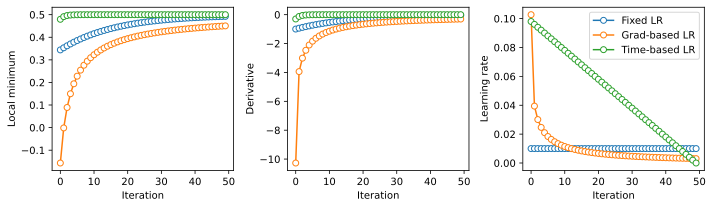

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
# Generate the plots
for i in range(3):
    ax[i].plot(model_params_fixed[:, i],    'o-',   markerfacecolor='w')
    ax[i].plot(model_params_grad[:, i],     'o-',   markerfacecolor='w')
    ax[i].plot(model_params_time[:, i],     'o-',   markerfacecolor='w')
    ax[i].set_xlabel('Iteration')

    if (i == 0):    ax[0].set_ylabel('Local minimum')
    if (i == 1):    ax[1].set_ylabel('Derivative')
    if (i == 2):
        ax[2].set_ylabel('Learning rate')
        ax[2].legend(['Fixed LR', 'Grad-based LR', 'Time-based LR'])

plt.tight_layout()
plt.show()


# Additional explorations
1) Change the initial learning rate in the "time" experiment from .1 to .01. Do you still reach the same conclusion that
   dynamic learning rates are better than a fixed learning rate?

2) Compute the average of all time-based learning rates (see variable 'modelparamsTime'). Next, replace the fixed 
   learning rate with the average over all dynamic learning rates. How does that affect the model's performance?

3) Going back to the original code (without the modifications above), you saw that the fixed learning rate model didn't
   get to the same local minimum. What happens if you increase the number of training epochs from 50 to 500? Does that 
   improve the situation, and what does that tell you about the relationship between learning rate and training epochs?

4) The code here initializes the starting value as a random number, which will differ for each learning rate method.
   Is that appropriate or inappropriate for this experiment? Why? Change the code so that the starting value is the
   same for all three learning rate models.